## About The Dataset

### Dataset Information
This dataset has been taken from the famous UCI Machine Learning Repository. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in a year on the basis of the features given.

An individual's annual income is the result of many different factors. Intuitively, it is influenced by the individual's education level, age, gender, occupation, etc.

### Dataset Description
+ **Age**: Describes the age of individuals. Continuous.   
+ **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.   
+ **fnlwgt**: Continuous.  
+ **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
+ **education-num**: Number of years spent in education. Continuous.  
+ **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
+ **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
+ **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
+ **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
+ **sex**: Female, Male.  
+ **capital-gain**: Continuous.  
+ **capital-loss**: Continuous.  
+ **hours-per-week**: Continuous.  
+ **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  
+ **income**: >50K, <=50K.

### Project Goal
`Predict income level based on individual information.`

### Dataset Source
https://github.com/ddan0606/Projects/tree/main/Datasets

## Creating a SparkSession Object

In [66]:
import findspark
findspark.init()

import pyspark 
from pyspark.sql import SparkSession
# May take awhile locally
spark = SparkSession.builder.appName("Project").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("You are working with", cores, "core(s)")
spark

You are working with 1 core(s)


## Import libraries

In [5]:
import pandas as pd

## Importing the Data

In [2]:
url = 'https://raw.githubusercontent.com/ddan0606/Projects/main/Datasets/adult.csv'

In [4]:
df = pd.read_csv(url, index_col = 0)
df.head(5)

,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,,
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Explore the Dataframe

In [75]:
df.count()

48842

In [76]:
df.columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [6]:
len(df.columns)

15

In [7]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [8]:
df.limit(5).toPandas()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
df.describe().toPandas()

,summary,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
1,mean,38.64358543876172,None,189664.13459727284,None,10.078088530363212,None,None,None,None,None,1079.0676262233324,87.50231358257237,40.422382375824085,None,None
2,stddev,13.710509934443563,None,105604.02542315733,None,2.570972755592263,None,None,None,None,None,7452.019057655401,403.0045521243599,12.3914440242523,None,None
3,min,17,?,12285,10th,1,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
4,max,90,Without-pay,1490400,Some-college,16,Widowed,Transport-moving,Wife,White,Male,99999,4356,99,Yugoslavia,>50K.


## Data Processing

### Rename Data

In [10]:
df = df.withColumnRenamed("educational-num", "educational_num") \
       .withColumnRenamed("marital-status", "marital_status")   \
       .withColumnRenamed("capital-gain", "capital_gain")       \
       .withColumnRenamed("capital-loss", "capital_loss")       \
       .withColumnRenamed("hours-per-week", "hours_per_week")   \
       .withColumnRenamed("native-country", "native_country") 

df.limit(5).toPandas()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Distinct Values in Column

In [11]:
df.select('income').distinct().limit(5).toPandas()

,income
0,>50K.
1,<=50K.
2,>50K
3,<=50K


### Replace String Column Values

In [12]:
from pyspark.sql.functions import regexp_replace

In [13]:
df = df.withColumn('income', regexp_replace('income', '>50K.', '>50K')) \
       .withColumn('income', regexp_replace('income', '<=50K.', '<=50K'))

df.select('income').distinct().limit(5).toPandas()

,income
0,>50K
1,<=50K


### Subset of a Dataframe

#### Select

In [14]:
df.select(['age', 'income']).limit(5).toPandas()

,age,income
0,25,<=50K
1,38,<=50K
2,28,>50K
3,44,>50K
4,18,<=50K


#### Filter

In [15]:
df.filter(df['age'] > 30).filter(df['fnlwgt'] > 50000).limit(5).toPandas()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
2,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
3,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
4,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


#### Where

In [16]:
df.where((df['age'] > 30) & (df['fnlwgt'] > 50000)).limit(5).toPandas()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
2,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
3,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
4,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### Aggregations

#### Mean

In [17]:
df.groupBy('income').agg({'age':'mean'}).limit(5).toPandas()

,income,avg(age)
0,>50K,44.275178
1,<=50K,36.872184


#### Sum

In [18]:
df.groupBy('income').agg({'age':'sum'}).limit(5).toPandas()

,income,sum(age)
0,>50K,517444
1,<=50K,1369986


#### Max

In [19]:
df.groupBy('income').agg({'age':'max'}).limit(5).toPandas()

,income,max(age)
0,>50K,90
1,<=50K,90


#### Min

In [20]:
df.groupBy('income').agg({'age':'min'}).limit(5).toPandas()

,income,min(age)
0,>50K,19
1,<=50K,17


### User-Defined Functions (UDFs)

In [21]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [22]:
def age_category(age):
    if age < 40 & age > 0:
        return "Young Adults"
    elif age < 60 & age >= 40:
        return "Middle-aged Adults"
    else:
        return "Old Adults"

In [23]:
age_udf = udf(age_category, StringType())
df      = df.withColumn('age_category', age_udf(df['age']))

df.select('age', 'age_category').limit(10).toPandas()

,age,age_category
0,25,Old Adults
1,38,Old Adults
2,28,Old Adults
3,44,Old Adults
4,18,Old Adults
5,34,Old Adults
6,29,Old Adults
7,63,Old Adults
8,24,Old Adults
9,55,Old Adults


### Data Cleaning

#### Null Values

In [24]:
num_vars = ["age", "fnlwgt", "educational_num", "capital_gain", "capital_loss", "hours_per_week"]

cat_vars = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "gender", "native_country", "income"]

In [25]:
def countNull(df, var):
    return df.where(df[var].isNull()).count()

all_cols = num_vars + cat_vars
{var: countNull(df, var) for var in all_cols}

{'age': 0,
 'fnlwgt': 0,
 'educational_num': 0,
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 0,
 'workclass': 0,
 'education': 0,
 'marital_status': 0,
 'occupation': 0,
 'relationship': 0,
 'race': 0,
 'gender': 0,
 'native_country': 0,
 'income': 0}

## Data Transformation

In [26]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [27]:
cat_indexers = ["workclass_idx", 
                "education_idx", 
                "marital_status_idx", 
                "occupation_idx", 
                "relationship_idx", 
                "race_idx",
                "gender_idx",
                "native_country_idx",
                "label"]

indexer = StringIndexer(inputCols = cat_vars, 
                        outputCols = cat_indexers).fit(df)

df = indexer.transform(df)

In [28]:
cat_vecs = ["workclass_vec", 
           "education_vec", 
           "marital_status_vec", 
           "occupation_vec", 
           "relationship_vec", 
           "race_vec",
           "gender_vec",
           "native_country_vec",
           "income_vec"]

encoder = OneHotEncoder(inputCols = cat_indexers,
                        outputCols = cat_vecs).fit(df)

df = encoder.transform(df)

In [29]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)
 |-- age_category: string (nullable = true)
 |-- workclass_idx: double (nullable = false)
 |-- education_idx: double (nullable = false)
 |-- marital_status_idx: double (nullable = false)
 |-- occupation_idx: double (nullable = false)
 |-- relationship_idx: double (nullable = false)
 |-- race_idx: double (nullable = false)
 |-- gender_idx: double (nullable = fal

In [30]:
assembler = VectorAssembler(inputCols = ['age',
                                         'workclass_vec',
                                         'fnlwgt',
                                         'education_vec',
                                         'educational_num',
                                         'marital_status_vec',
                                         'occupation_vec',
                                         'relationship_vec',
                                         'race_vec',
                                         'gender_vec',
                                         'capital_gain',
                                         'capital_loss',
                                         'hours_per_week',
                                         'native_country_vec'], 
                             outputCol = "features")

df = assembler.transform(df)

In [31]:
df.select(['features', 'label']).limit(10).toPandas()

,features,label
0,"(25.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
1,"(38.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
2,"(28.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
3,"(44.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
4,"(18.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.0
5,"(34.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
6,"(29.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.0
7,"(63.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
8,"(24.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
9,"(55.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0


In [32]:
model_df = df.select(['features', 'label'])
model_df.limit(10).toPandas()

,features,label
0,"(25.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
1,"(38.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
2,"(28.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
3,"(44.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
4,"(18.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.0
5,"(34.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
6,"(29.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.0
7,"(63.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
8,"(24.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
9,"(55.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0


## Splitting the Dataset

In [33]:
(test, train) = model_df.randomSplit([0.3, 0.7])

print(f"Size of train Dataset : {train.count()}")
print(f"Size of test Dataset : {test.count()}")

Size of train Dataset : 34218
Size of test Dataset : 14624


## Build and Train Model


In [34]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

### RandomForestClassifier

In [35]:
rf                   = RandomForestClassifier()
rf_model             = rf.fit(train)
rf_model_predictions = rf_model.transform(test)

### GBTClassifier

In [58]:
gbt                   = GBTClassifier()
gbt_model             = gbt.fit(train)
gbt_model_predictions = gbt_model.transform(test)

## The best hyperparameters

In [59]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

### RandomForestClassifier

In [38]:
paramGrid_rf = (ParamGridBuilder()
                .addGrid(rf.subsamplingRate,       [0.00001, 0.0001, 0.001, 0.1, 1.0])
                .addGrid(rf.featureSubsetStrategy, ['auto', 'all', 'onethird', 'sqrt', 'log2'])
                .addGrid(rf.numTrees,              [5, 10, 15, 20, 25])
                .build())

In [39]:
cv_rf = CrossValidator(estimator          = rf, 
                       estimatorParamMaps = paramGrid_rf,
                       evaluator          = BinaryClassificationEvaluator(), 
                       numFolds           = 5)

cv_rf_model = cv_rf.fit(train)

### GBTClassifier

In [60]:
paramGrid_gbt = (ParamGridBuilder()
                .addGrid(gbt.subsamplingRate,       [1.0])
                .addGrid(gbt.featureSubsetStrategy, ['all'])
                .addGrid(gbt.maxIter ,              [5, 10, 15, 20, 25])
                .build())

In [61]:
cv_gbt = CrossValidator(estimator          = gbt, 
                        estimatorParamMaps = paramGrid_gbt,
                        evaluator          = BinaryClassificationEvaluator(), 
                        numFolds           = 5)

cv_gbt_model = cv_gbt.fit(train)

## Evaluation on Test Data

### RandomForestClassifier

In [42]:
best_rf_model  = cv_rf_model.bestModel
rf_predictions = best_rf_model.transform(test)

### GBTClassifier

In [62]:
best_gbt_model  = cv_gbt_model.bestModel
gbt_predictions = best_gbt_model.transform(test)

## Accuracy

### RandomForestClassifier

In [44]:
rf_accuracy = MulticlassClassificationEvaluator(labelCol   = 'label',
                                                metricName = 'accuracy') \
                                                .evaluate(rf_predictions) 
    
print('The accuracy of RF on test data is {0:.0%}'.format(rf_accuracy))

The accuracy of RF on test data is 84%


### GBTClassifier

In [45]:
gbt_accuracy = MulticlassClassificationEvaluator(labelCol   = 'label',
                                                 metricName = 'accuracy') \
                                                .evaluate(gbt_predictions) 
    
print('The accuracy of GBT on test data is {0:.0%}'.format(gbt_accuracy))

The accuracy of GBT on test data is 86%


## F1 score

### RandomForestClassifier

In [46]:
rf_f1 = MulticlassClassificationEvaluator(labelCol   = 'label',
                                          metricName = 'f1') \
                                          .evaluate(rf_predictions) 
    
print('The accuracy of RF on test data is {0:.0%}'.format(rf_f1))

The accuracy of RF on test data is 83%


### GBTClassifier

In [47]:
gbt_f1 = MulticlassClassificationEvaluator(labelCol   = 'label',
                                           metricName = 'f1') \
                                           .evaluate(gbt_predictions) 
    
print('The accuracy of RF on test data is {0:.0%}'.format(gbt_f1))

The accuracy of RF on test data is 85%


## Precision

### RandomForestClassifier

In [48]:
rf_precision = MulticlassClassificationEvaluator(labelCol   = 'label',
                                                 metricName = 'weightedPrecision') \
                                                 .evaluate(rf_model_predictions)

print('The precision rate on test data is {0:.0%}'.format(rf_precision))

The precision rate on test data is 83%


### GBTClassifier

In [49]:
gbt_precision = MulticlassClassificationEvaluator(labelCol   = 'label',
                                                  metricName = 'weightedPrecision') \
                                                  .evaluate(gbt_model_predictions)

print('The precision rate on test data is {0:.0%}'.format(gbt_precision))

The precision rate on test data is 85%


## AUC

### RandomForestClassifier

In [50]:
rf_auc = BinaryClassificationEvaluator(labelCol = 'label').evaluate(rf_predictions)

print('The AUC on test data is {0:.0%}'.format(rf_auc))

The AUC on test data is 90%


### GBTClassifier

In [51]:
gbt_auc = BinaryClassificationEvaluator(labelCol = 'label').evaluate(gbt_predictions)

print('The AUC on test data is {0:.0%}'.format(gbt_auc))

The AUC on test data is 91%


## ROC

### RandomForestClassifier

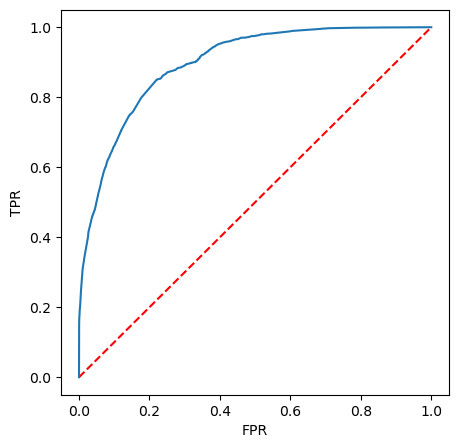

In [65]:
plt.figure(figsize = (5, 5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(best_rf_model.summary.roc.select('FPR').collect(),
         best_rf_model.summary.roc.select('TPR').collect())

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()